## Tensorflow

**Sequential** provides training and inference features on this model.  
- layers can be passed on create or .add() after

In [1]:
from tensorflow.keras.models import Sequential
Sequential(layers=None, name=None)

**Dense** implements the operation: **output = activation(dot(input, kernel) + bias)**  
Where **activation** is the element-wise activation function passed as the activation argument  
**Kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer**  
(only applicable if use_bias is True)

In [3]:
from tensorflow.keras.layers import Dense
units = 16 # output layers
Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
      bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
      activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

**The Dropout layer** randomly sets input units to 0
- **Frequency of rate** at each step during training time  

**This helps prevent overfitting.**  
Inputs not set to 0 are scaled up by 1/(1 - rate)
- The sum over all inputs is unchanged.



In [4]:
from tensorflow.keras.layers import Dropout
rate=0.1 # 10%
Dropout(rate, noise_shape=None, seed=None)

Adam optimization is a **stochastic gradient descent method**  
- Based on **adaptive estimation** of *first-order* and *second-order* moments.

In [5]:
from tensorflow.keras.optimizers import Adam
Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,
     epsilon=1e-07, amsgrad=False, name='Adam')

**Convolution kernel** that is convolved with the layer input to produce a tensor of outputs.  
If use_bias is True, a bias vector is created and added to the outputs.  
Finally, if activation is not None, it is applied to the outputs as well.  

When using this layer as the first layer in a model, provide the keyword argument input_shape 
- tuple of integers, does not include the sample axis
- e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last".

In [6]:
from tensorflow.keras.layers import Conv2D
filters, kernel_size = 2, 3
Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
       dilation_rate=(1, 1), activation=None, use_bias=True,
       kernel_initializer='glorot_uniform', bias_initializer='zeros',
       kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
       kernel_constraint=None, bias_constraint=None)

#### Max pooling layer for 2D inputs (e.g. images).

In [7]:
from tensorflow.keras.layers import MaxPooling2D
MaxPooling2D(pool_size=2 ,strides=2, padding='valid', data_format='channels_last', name=None)

#### Flattens the input. Does not affect the batch size.

In [8]:
from tensorflow.keras.layers import Flatten
Flatten(data_format=None)

#### Converts a class vector (integers) to boolean category class matrix.

In [11]:
from tensorflow.keras.utils import to_categorical
to_categorical(train_labels[0]) # 5

array([0., 0., 0., 0., 0., 1.], dtype=float32)

## MNIST handwritten digits dataset.

In [12]:
train_images.shape

(60000, 784)

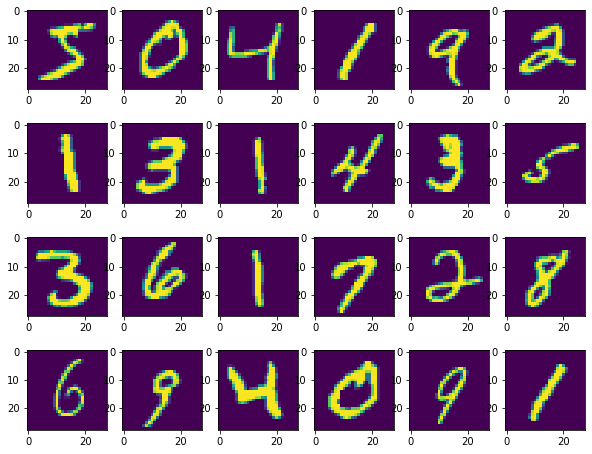

In [10]:
import mnist

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Plot first 24 images
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(10,8))
[
    ax[y][x].imshow(train_images[y*6+x])
    for y in range(4) for x in range(6)
]
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

### ImageDataGenerator
Generate batches of tensor image data with real-time data augmentation.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False,
    vertical_flip=False, rescale=None, preprocessing_function=None,
    data_format=None, validation_split=0.0, dtype=None
)

## Basic tensor work flow

In [ ]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dropout(0.1,input_shape=(8,)),
  Dense(10, activation='softmax'),
])
# Compile the model.
model.compile(
  optimizer="adam",
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=20,
  batch_size=128,
)
# Evaluate the model
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

## Convolutional neural net

In [21]:
train_images = mnist.train_images().reshape(
    60000,28,28,1)
test_images = mnist.test_images().reshape(
    10000,28,28,1)
train_labels = mnist.train_labels()
test_labels = mnist.test_labels()

train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images.shape

(60000, 28, 28)

In [ ]:
model = Sequential([
    Conv2D(3, (5, 5), strides=(1,1), activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1000, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    train_images,
    to_categorical(train_labels),
    batch_size=1,
    epochs=1
)
model.fit(
    train_images,
    to_categorical(train_labels),
    batch_size=512,
)
model.fit(
    train_images,
    to_categorical(train_labels),
    batch_size=1024,
)
model.fit(
    train_images,
    to_categorical(train_labels),
    batch_size=2048,
)

model.evaluate(
  test_images,
  to_categorical(test_labels)
)